In [21]:
import os
import shutil
import random
import numpy as np
import pandas as pd

from pathlib import Path

In [ ]:
random.seed(42)  # random seed를 고정합니다.

orig_train_dir = "/mnt/nas65/Dataset/ImageNet1K/ILSVRC/Data/CLS-LOC/train"
new_train_dir = "/mnt/nas65/Dataset/ImageNet1K/ILSVRC/Data/CLS-LOC/10cls_100_train"

# 원하는 클래스 목록입니다.
class_list = [
    'n02084071','n02134084',
    'n04536866','n07745940', 
    'n03028079','n12985857',
    'n02690373','n02783161', 
    'n03425413','n13054560',
]

os.makedirs(new_train_dir, exist_ok=True)

for class_folder in class_list:
    class_path = os.path.join(orig_train_dir, class_folder)
    new_class_path = os.path.join(new_train_dir, class_folder)
    os.makedirs(new_class_path, exist_ok=True)

    if os.path.isdir(class_path):
        image_list = os.listdir(class_path)
        random.shuffle(image_list)
        selected_images = image_list[:100]  # 원하는 이미지 개수를 선택합니다.

        for image in selected_images:
            src_path = os.path.join(class_path, image)
            dst_path = os.path.join(new_class_path, image)
            shutil.copy(src_path, dst_path)  # 이미지를 새로운 폴더에 복사합니다.


In [11]:
from torchvision import datasets, transforms
import os

In [12]:
i = datasets.ImageFolder('../data/ImageNet1K/ILSVRC/Data/CLS-LOC/300_train/')

In [19]:
i.imgs[500]

('../data/ImageNet1K/ILSVRC/Data/CLS-LOC/300_train/n01443537/n01443537_24803.JPEG',
 1)

In [2]:
import os
import shutil
import xml.etree.ElementTree as ET

# 기본 경로 설정
annotations_path = '/home/tak/IBT/Image-back-translation/data/ImageNet1K/ILSVRC/Annotations/CLS-LOC/val'
images_path = '/home/tak/IBT/Image-back-translation/data/ImageNet1K/ILSVRC/Data/CLS-LOC/val'
output_path = '/home/tak/IBT/Image-back-translation/data/ImageNet1K/ILSVRC/Data/CLS-LOC/val_formatted'

# XML 파일을 파싱하고 이미지 파일 이름과 레이블 정보를 추출합니다.
for xml_file in os.listdir(annotations_path):
    if xml_file.endswith('.xml'):
        tree = ET.parse(os.path.join(annotations_path, xml_file))
        root = tree.getroot()

        image_file = root.find('filename').text
        label = root.find('object').find('name').text

        # 각 클래스에 대해 서브 폴더를 생성합니다.
        class_folder = os.path.join(output_path, label)
        if not os.path.exists(class_folder):
            os.makedirs(class_folder)

        # 이미지 파일들을 각 클래스의 서브 폴더로 이동시킵니다.
        image_file_ext = image_file + ".JPEG"  # 이미지 확장자 추가
        src_path = os.path.join(images_path, image_file_ext)
        dst_path = os.path.join(class_folder, image_file_ext)
        shutil.move(src_path, dst_path)


In [3]:
from typing import Any, Dict, Optional, Tuple

import os
import torch
from lightning import LightningDataModule
from torch.utils.data import ConcatDataset, DataLoader, Dataset, random_split
from torchvision.transforms import transforms
from torchvision import datasets, transforms

transform = transforms.Compose([
            transforms.Resize((256, 256)),
            transforms.CenterCrop(224),
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
        ])

full_train_dataset = datasets.ImageFolder('../data/ImageNet1K/ILSVRC/Data/CLS-LOC/300_train', transform)

In [4]:
full_train_dataset.imgs[0]

('../data/ImageNet1K/ILSVRC/Data/CLS-LOC/300_train/n01440764/n01440764_10066.JPEG',
 0)

In [6]:
import matplotlib.pyplot as plt
from torchvision import transforms, datasets

# train_dataset 생성
train_dataset = datasets.ImageFolder(root='../data/ImageNet1K/ILSVRC/Data/CLS-LOC/300_train/', transform=transforms.ToTensor())
val_dataset = datasets.ImageFolder(root='../data/ImageNet1K/ILSVRC/Data/CLS-LOC/val_formatted/', transform=transforms.ToTensor())
# 시각화할 이미지 수
num_images = 5

# 시각화할 이미지와 라벨을 가져옴
images = []
labels = []
for image_path, label in train_dataset.imgs:
    images.append(image_path)
    labels.append(label)
    break

print(f"image:{images}")
print(f"label:{labels}")
# 이미지와 라벨을 시각화
# fig, axs = plt.subplots(1, num_images, figsize=(20, 5))
# for i in range(num_images):
#     axs[i].imshow(images[i].permute(1, 2, 0))
#     axs[i].set_title(train_dataset.classes[labels[i]])
#     axs[i].axis('off')
# plt.show()

image:['../data/ImageNet1K/ILSVRC/Data/CLS-LOC/300_train/n01440764/n01440764_10066.JPEG']
label:[0]


In [7]:
print('Train Classes:', train_dataset.classes)
print('Train Class to index:', train_dataset.class_to_idx)
print('Val Classes:', val_dataset.classes)
print('ValClass to index:', val_dataset.class_to_idx)

Train Classes: ['n01440764', 'n01443537', 'n01484850', 'n01491361', 'n01494475', 'n01496331', 'n01498041', 'n01514668', 'n01514859', 'n01518878', 'n01530575', 'n01531178', 'n01532829', 'n01534433', 'n01537544', 'n01558993', 'n01560419', 'n01580077', 'n01582220', 'n01592084', 'n01601694', 'n01608432', 'n01614925', 'n01616318', 'n01622779', 'n01629819', 'n01630670', 'n01631663', 'n01632458', 'n01632777', 'n01641577', 'n01644373', 'n01644900', 'n01664065', 'n01665541', 'n01667114', 'n01667778', 'n01669191', 'n01675722', 'n01677366', 'n01682714', 'n01685808', 'n01687978', 'n01688243', 'n01689811', 'n01692333', 'n01693334', 'n01694178', 'n01695060', 'n01697457', 'n01698640', 'n01704323', 'n01728572', 'n01728920', 'n01729322', 'n01729977', 'n01734418', 'n01735189', 'n01737021', 'n01739381', 'n01740131', 'n01742172', 'n01744401', 'n01748264', 'n01749939', 'n01751748', 'n01753488', 'n01755581', 'n01756291', 'n01768244', 'n01770081', 'n01770393', 'n01773157', 'n01773549', 'n01773797', 'n0177438

In [1]:
import sys
sys.path.insert(0, '..')

import os
import torchvision.transforms as transforms
import torch
import matplotlib.pyplot as plt
from src.data.imagenet1k_n_classes_datamodule import ImageNet1K_N_ClassesDataModule


# 이전에 제공한 ImageNet1K_N_ClassesDataModule 클래스 코드를 붙여넣기

# 설정
data_dir = "/home/tak/IBT/Image-back-translation/data/ImageNet1K/ILSVRC/Data/CLS-LOC/" # 실제 데이터셋 경로로 변경해주세요
selected_classes = ['n01910747','n02085936'
                    ,'n02134084','n04536866' 
                    ,'n07745940','n04552348'
                    ,'n04548280','n07734744'
                    ,'n02783161','n02676566'
                    ,'n01910747'] # 원하는 클래스 이름으로 변경해주세요
batch_size = 8
num_workers = 2

# 데이터 모듈 초기화
data_module = ImageNet1K_N_ClassesDataModule(
    data_dir=data_dir, 
    batch_size=batch_size, 
    num_workers=num_workers, 
    selected_classes=selected_classes
)



TRAIN 데이터셋 이미지 및 레이블:


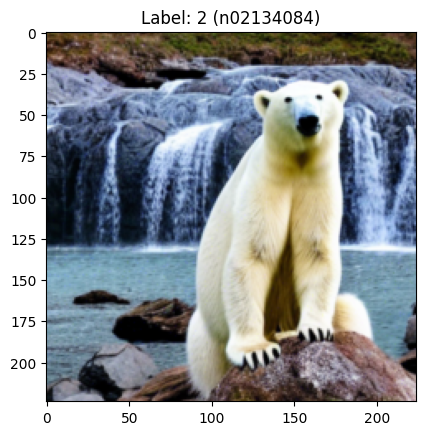

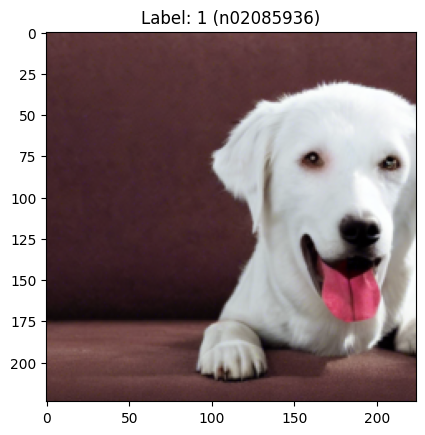

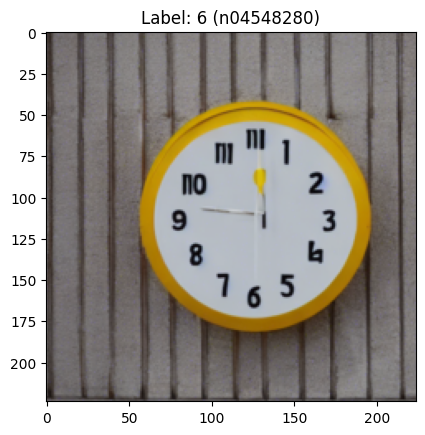

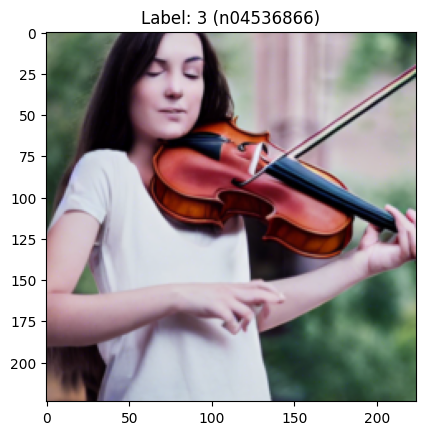

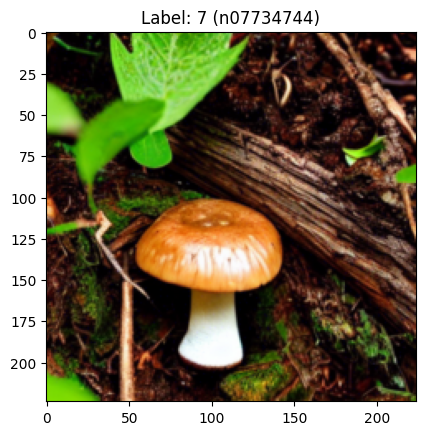

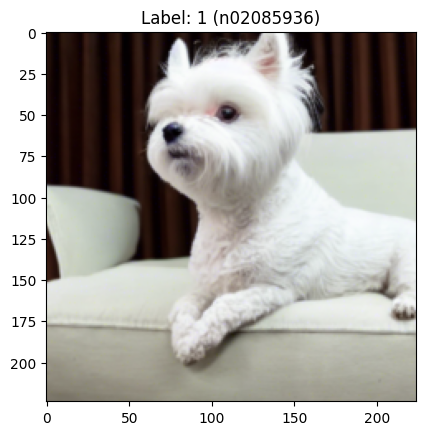

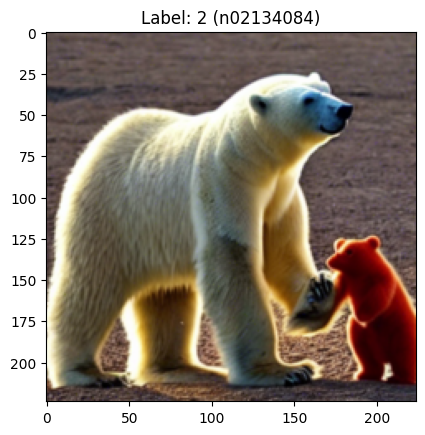

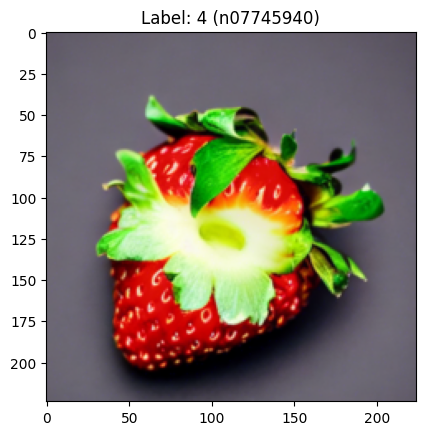

VAL 데이터셋 이미지 및 레이블:


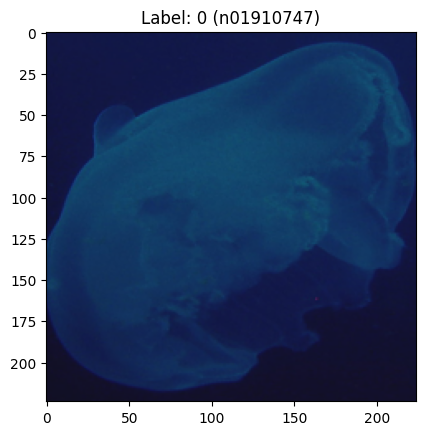

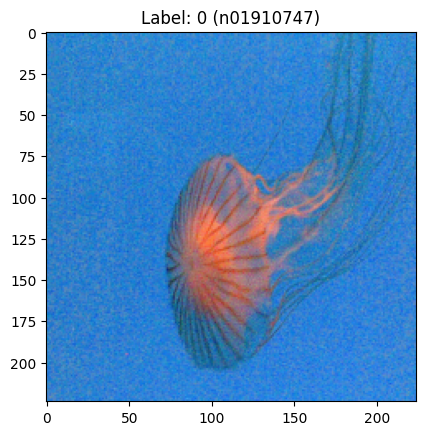

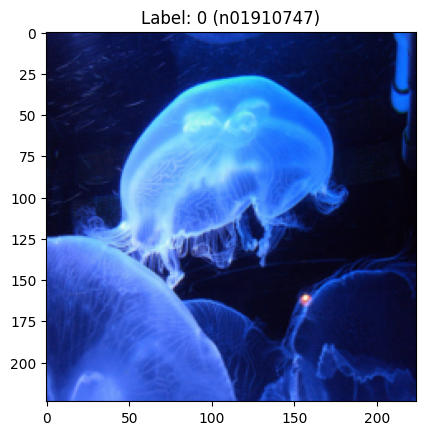

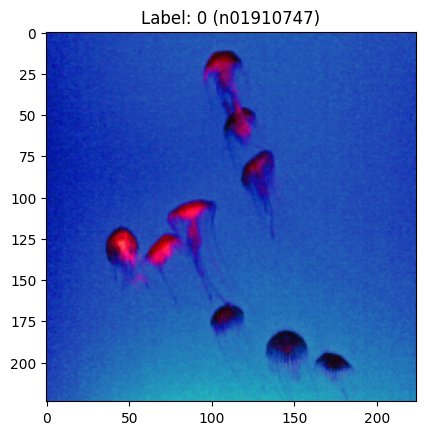

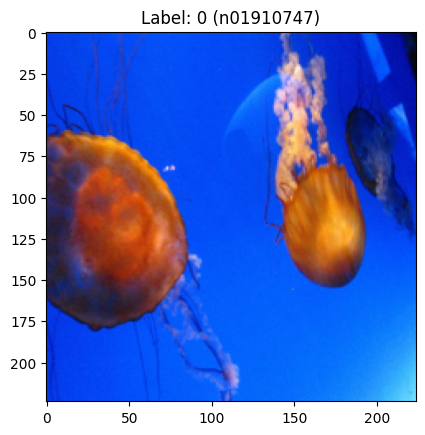

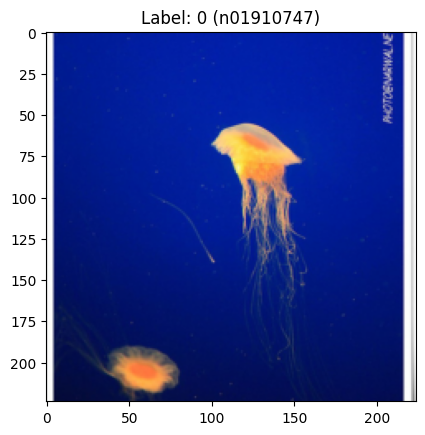

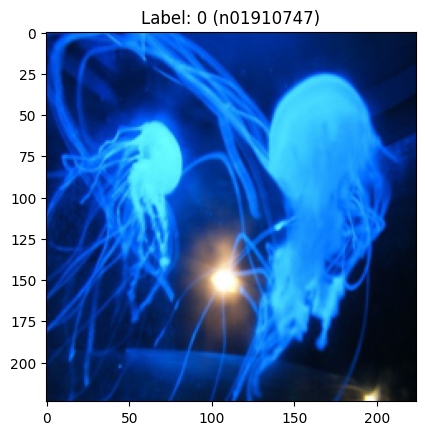

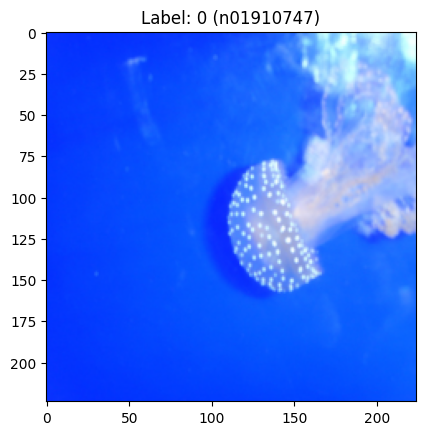

In [2]:
# 데이터셋 준비
data_module.setup('fit')  # 훈련 및 검증 데이터셋


# 데이터 로더 가져오기
train_loader = data_module.train_dataloader()
val_loader = data_module.val_dataloader()


loaders = {'train': train_loader, 'val': val_loader}

for loader_name, loader in loaders.items():
    print(f"{loader_name.upper()} 데이터셋 이미지 및 레이블:")
    
    # 첫 번째 배치의 이미지와 레이블 가져오기
    images, labels = next(iter(loader))

    # 이미지와 레이블 출력
    for i, (image, label) in enumerate(zip(images, labels)):
        # 이미지를 CPU로 이동하고 넘파이 배열로 변환
        image = image.cpu().numpy().transpose(1, 2, 0)
        
        # 이미지 정규화 해제
        mean = [0.485, 0.456, 0.406]
        std = [0.229, 0.224, 0.225]
        image = (image * std) + mean
        image = image.clip(0, 1)
        
        # 클래스 이름을 가져오기 위한 레이블을 인덱스로 사용
        class_name = loader.dataset.classes[label.item()]
        
        plt.figure()
        plt.imshow(image)
        plt.title(f"Label: {label.item()} ({class_name})")
        plt.show()


In [27]:
import pandas as pd
import os

csv_file_path = "/home/tak/IBT/Image-back-translation/data/ImageNet1K/ILSVRC/Data/CLS-LOC/train_csv/n02134084.csv"

data_frame = pd.read_csv(csv_file_path)

In [37]:
real_image_path = data_frame.iloc[0,0]
print(real_image_path)
print(data_frame.iloc[0,:])

/home/datasets/ImageNet1K/ILSVRC/Data/CLS-LOC/train/n02134084/n02134084_1131.JPEG
org_img_path    /home/datasets/ImageNet1K/ILSVRC/Data/CLS-LOC/...
caption                        a polar bear is standing on a rock
Name: 0, dtype: object


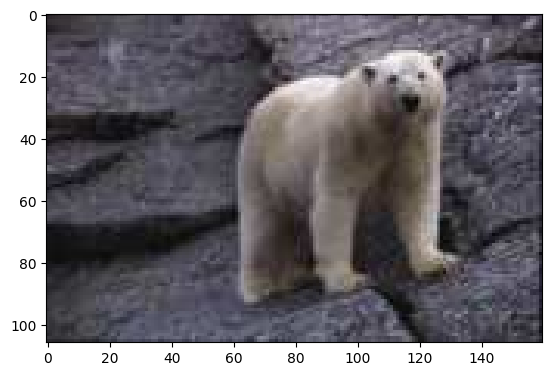

In [33]:
import matplotlib.pyplot as plt

plt.imshow(plt.imread('../data/ImageNet1K/ILSVRC/Data/CLS-LOC/train/n02134084/n02134084_1131.JPEG'))

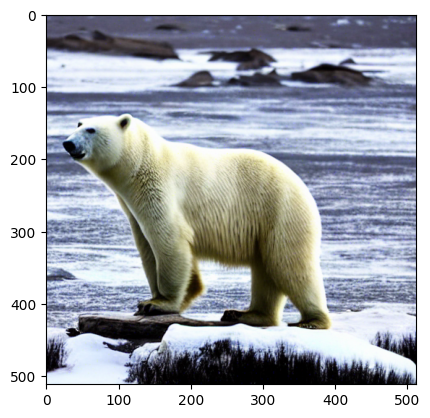

In [35]:
plt.imshow(plt.imread('../data/ImageNet1K/ILSVRC/Data/CLS-LOC/train_diff/n02134084/1131_0.png'))